In [10]:
from hossam import load_data

from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from math import sqrt 


from scipy.stats import t, ttest_1samp, normaltest, shapiro,  levene, ttest_ind

In [2]:
bread = load_data('bread')
bread

[data] https://data.hossam.kr/data/lab10/bread.xlsx
[desc] 매일 아침 동네 빵집에서 식빵을 구입해 무게를 기록한 데이터
[!] Cannot read metadata


,무게
0,482
1,479
2,485
3,474
4,479
5,477
6,482
7,480
8,480
9,483


In [3]:
bread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   무게      25 non-null     int64
dtypes: int64(1)
memory usage: 332.0 bytes


In [4]:
print("\n🍭데이터 크기 확인")
print(f"데이터셋 크기:{bread.shape[1]}")

print("\n🍭타입확인")
print(bread.info())

bread.head()


🍭데이터 크기 확인
데이터셋 크기:1

🍭타입확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   무게      25 non-null     int64
dtypes: int64(1)
memory usage: 332.0 bytes
None


,무게
0,482
1,479
2,485
3,474
4,479


In [6]:
# 그룹 a의 평균
a.mean()

np.float64(479.46153846153845)

In [7]:
# 그룹 b의 평균
b.mean()
b.info()

<class 'pandas.core.series.Series'>
RangeIndex: 12 entries, 13 to 24
Series name: 무게
Non-Null Count  Dtype
--------------  -----
12 non-null     int64
dtypes: int64(1)
memory usage: 228.0 bytes


H0:500g을 충족하지 못한다
H1:500g을 충족한다

In [ ]:
# 정규성 체크
s, p = normaltest(bread['무게'])
"statistic: {0:.3f}, p-value:{1:.3f}, 정규성 충족 여부: {2}".format(s, p,p > 0.05)

'statistic: 0.083, p-value:0.959, 정규성 충족 여부: True'

In [ ]:
# 데이터 정규성 검정
s, p = ttest_1samp(bread['무게'], 480)
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s,p,"대립" if p <= 0.05 else "귀무")

'statistic:-0.445, p-value:0.660, 귀무가설 채택'

In [ ]:
# 단일표본 T검정 T-Test
s, p = ttest_1samp(bread['무게'], 480, alternative='less')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설채택".format(s,p, "대립" if p<=0.05 else "귀무")

'statistic:-0.445, p-value:0.330, 귀무가설채택'

In [ ]:
s, p = ttest_1samp(bread['무게'],480, alternative = 'greater')
"statistic: {0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s,p,"대립" if p <= 0.05 else "귀무")

'statistic: -0.445, p-value:0.670, 귀무가설 채택'

In [ ]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()


plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

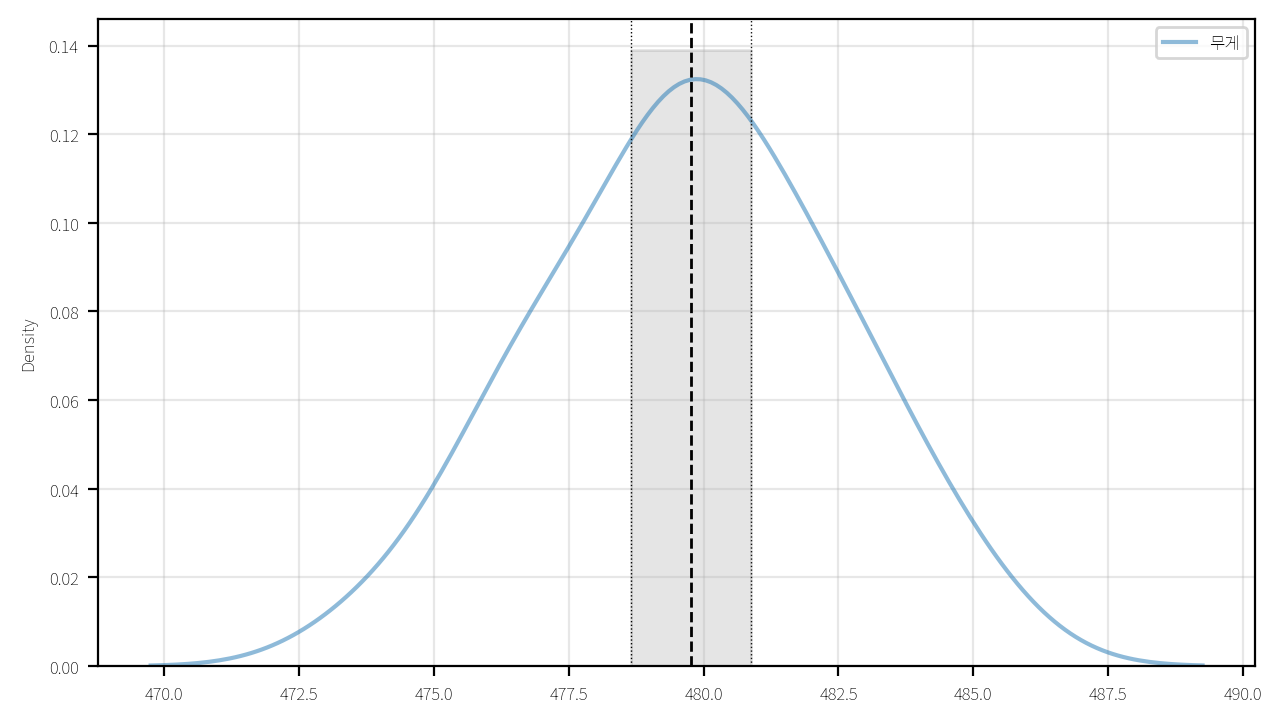

In [ ]:
data = bread['무게']
max = data.max()
clevel = 0.95
dof = len(data) - 1
sp_mean = data.mean()
sp_std = data.std(ddof=1)
sp_std_error = sp_std/sqrt(len(data))

cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.kdeplot(data=bread, fill=False, alpha = 0.5)
           

ax.axvline(cmin, linestyle=':', color='#000000', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color="#121212",linewidth=0.5)


ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax],0,ymax,alpha=0.1, color='#000000')
ax.axvline(sp_mean, linestyle='--', linewidth=1, color='#000000')


ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

In [23]:
# a그룹과 b그룹간의 비교

stat_a, shapiro_a = shapiro(a)
stat_b, shapiro_b = shapiro(b)

print(f"[정규성 검정]a그룹 p-value:{shapiro_a:.4f}->{'만족' if  shapiro_a > 0.05 else '불만족'}")
print(f"[정규성검정]b그룹 p-value:{shapiro_b:.4f}->{'만족'if shapiro_b > 0.05 else '불만족'}")
print("-"*30)
stat_levene, p_levene = levene(a,b)
equal_var_assumption = p_levene > 0.05

print(f"[등분산성 검정] p-value:{p_levene:.4f} -> 등분산{'가정함' if equal_var_assumption else '가정 안 함'}")
print("-" * 30)

# 독립 표본 T-검정
t_stat,p_val = ttest_ind(a,b,equal_var = equal_var_assumption)

print(f"[최종 T-검정]  p-value:{p_val:.4f}")

if p_val < 0.05:
    print("결과: 두 기간의 빵 무게에는 '유의미한 차이가 있습니다' (귀무가설 기각).")

else:
    print("결과:25일 전체 기간 동안 빵 무게의 유의미한 변화는 없는 것으로 나타났습니다(귀무가설 채택)")

[정규성 검정]a그룹 p-value:0.9835->만족
[정규성검정]b그룹 p-value:0.9802->만족
------------------------------
[등분산성 검정] p-value:0.4295 -> 등분산가정함
------------------------------
[최종 T-검정]  p-value:0.5757
결과:25일 전체 기간 동안 빵 무게의 유의미한 변화는 없는 것으로 나타났습니다(귀무가설 채택)


In [ ]:
# 전체 25개 중 앞의 13개 (0~12번 인덱스)
a = bread['무게'].iloc[:13]

# 전체 25개 중 나머지 12개(13번~끝까지)
b = bread['무게'].iloc[13:]

print(f"그룹 a 크기:{len(a)}")
print(f"그룹 b 크기:{len(b)}")

그룹 a 크기:13
그룹 b 크기:12


In [ ]:
총 25일 중 13일을 a집단, 그리고 12일을 b집단으로 나누어 표본 크기를 구해 등분산성 검정을 실행했습니다. 따라서, 13일과 12일을 합친 빵의 무게의 분산은 같다는 결과로 나타났습니다./n
이를 통해서 알 수 있는 점은, 